In [22]:
from math import inf


data = range(10, 32, 3)

data = list(data)

love = {rj:inf for rj in data}
hate = {rj:0 for rj in data}

print(love)
print(hate)

{10: inf, 13: inf, 16: inf, 19: inf, 22: inf, 25: inf, 28: inf, 31: inf}
{10: 0, 13: 0, 16: 0, 19: 0, 22: 0, 25: 0, 28: 0, 31: 0}


[(0, 7), (0, 4), (0, 1), (1, 8), (2, 4), (2, 5), (2, 3), (3, 6), (4, 7), (5, 7), (6, 7), (7, 8)]


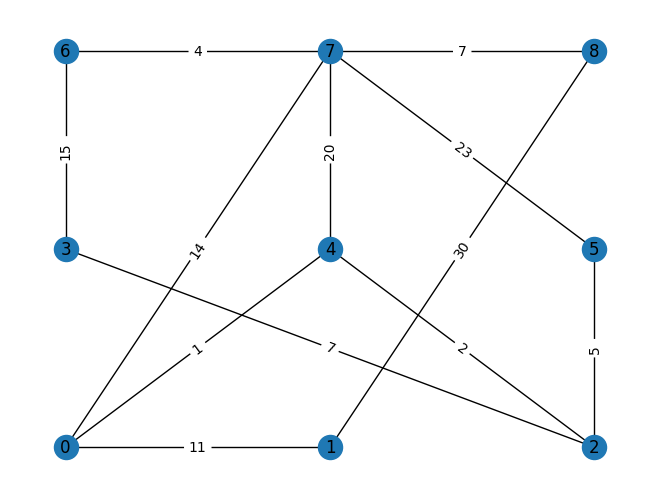

In [84]:
import networkx as nx

g = nx.Graph()

g.add_nodes_from(range(9))

pos = []
for i in range(3):
    for j in range(3):
        pos.append((j,i))

g.node_pos = pos

w_edges = [(0,7,14), (4, 7, 20), (6, 7, 4), (8, 7, 7), (5, 7, 23),
            (0, 4, 1), (2, 4, 2), (3, 6, 15), (1, 8, 30), (2, 5, 5),
            (2, 3, 7), (1, 0, 11)]
g.add_weighted_edges_from(w_edges)

w_labels = {e:g.edges[e]['weight'] for e in g.edges}

nx.draw(g, pos, with_labels=True)
nx.draw_networkx_edge_labels(g, pos, edge_labels=w_labels)

print(g.edges)

# nx.draw(g.subgraph([1,3,4,5,3]))

In [1]:
a = [True, False]
b = [-1, 0, 1]
c = [1, 2, 3, 4]

found = False
count = 0
for i in a:
    for j in b:
        for k in c:
            count += 1
            if(i==False and j == -1 and k == 4):
                print('solution found!', '@', count, 'iteration')
                print(i, j, k, sep='::')
                found = True
                break
        if found:
            break
    if found:
        break

solution found! @ 16 iteration
False::-1::4


In [18]:
print(g.nodes())
a = {g.edges()[e]['weight'] for e in g.edges}
a

[0, 1, 2, 3, 4, 5, 6, 7, 8]


{1, 2, 4, 5, 7, 11, 14, 15, 20, 23, 30}

{(0, 4): Text(0.5, 0.5, '10'),
 (0, 1): Text(0.0, 0.5, '6'),
 (0, 3): Text(0.5, 0.0, '2'),
 (1, 4): Text(0.5, 1.0, '11'),
 (1, 2): Text(0.0, 1.5, '9'),
 (2, 4): Text(0.5, 1.5, '12'),
 (2, 5): Text(0.5, 2.0, '4'),
 (3, 4): Text(1.0, 0.5, '13'),
 (3, 6): Text(1.5, 0.0, '8'),
 (4, 7): Text(1.5, 1.0, '11'),
 (4, 5): Text(1.0, 1.5, '15'),
 (4, 6): Text(1.5, 0.5, '10'),
 (4, 8): Text(1.5, 1.5, '12'),
 (5, 8): Text(1.5, 2.0, '7'),
 (6, 7): Text(2.0, 0.5, '3'),
 (7, 8): Text(2.0, 1.5, '4')}

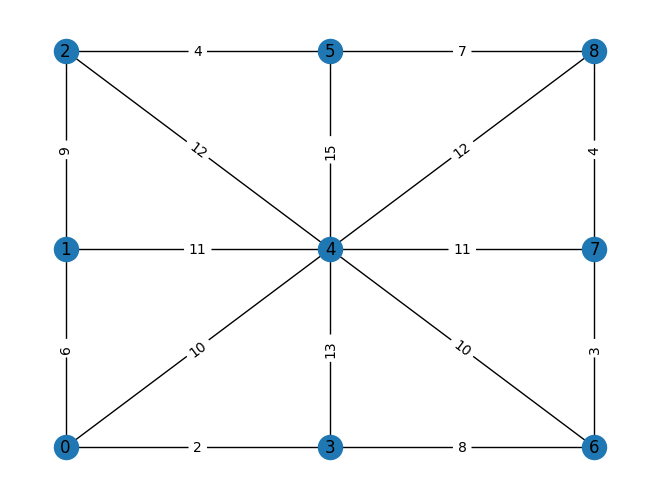

In [62]:
import networkx as nx

graph = nx.Graph()
node_list = {i for i in range(9)}
graph.add_nodes_from(node_list)

pos = []
for i in range(9):
    pos.append([i//3, i%3])
graph.node_pos = pos

edges1 = {(4,i,i%6+10) for i in range(9) if(i!=4)}
graph.add_weighted_edges_from(edges1)

edges2 = {(0,1,6), (1,2,9), (2,5,4), (5,8,7), (7,8,4), (6,7,3), (3,6,8), (0,3,2)}
graph.add_weighted_edges_from(edges2)


labels = {e:graph.edges[e]['weight'] for e in graph.edges}

nx.draw(graph, pos, with_labels=True)
nx.draw_networkx_edge_labels(graph, pos, labels)

In [57]:
edges1

{(4, 0, 10),
 (4, 1, 11),
 (4, 2, 12),
 (4, 3, 13),
 (4, 4, 14),
 (4, 5, 15),
 (4, 6, 10),
 (4, 7, 11),
 (4, 8, 12)}

In [78]:
from math import inf
def rj_dijkstra(G, start):
    def next_node():
        u = L[0]
        du = D[u]

        for v in L[1:]:
            if(D[v] < du):
                u, du = v, D[v]
        L.remove(u)
        return u, du
    
    L = list(G.nodes)
    D = {nodes:inf for nodes in G.nodes}
    P = {nodes:None for nodes in G.nodes}

    D[start] = 0

    while L:
        u, du = next_node()
        for v in G.neighbors(u):
            if(du+G.adj[u][v]['weight'] < D[v]):
                D[v] = du+G.adj[u][v]['weight']
                P[v] = u

    return P, D

In [89]:
st_node = 0
tg_node = 5

P, D = rj_dijkstra(graph,st_node)
print(P)
print(D)

sh_path = []
p = tg_node
while(p != None):
    sh_path.append(p)
    p = P[p]

sh_path.reverse()
print(f'\nShortest distance from {st_node} to {tg_node} = {D[tg_node]}')
print(f'Path Sequence : {sh_path}')

{0: None, 1: 0, 2: 1, 3: 0, 4: 0, 5: 2, 6: 3, 7: 6, 8: 7}
{0: 0, 1: 6, 2: 15, 3: 2, 4: 10, 5: 19, 6: 10, 7: 13, 8: 17}

Shortest distance from 0 to 5 = 19
Path Sequence : [0, 1, 2, 5]
